In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, argsort

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

# load the data
df = pd.read_csv('training_2.csv')
cols=[i for i in df.columns if i not in ['timestamp']]
for col in cols:
    df[col]=pd.to_numeric(df[col])
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

,timestamp,kpi_value,anomaly_label
0,2014-04-01 00:00:00,0.0,0
1,2014-04-01 00:05:00,0.0,0
2,2014-04-01 00:10:00,0.0,0
3,2014-04-01 00:15:00,0.0,0
4,2014-04-01 00:20:00,0.0,0


In [2]:
df.shape

(4032, 3)

In [3]:
# check the missing values
df.isna().sum().any()

False

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      4032 non-null   datetime64[ns]
 1   kpi_value      4032 non-null   float64       
 2   anomaly_label  4032 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 94.6 KB


In [6]:
df.columns

Index(['timestamp', 'kpi_value', 'anomaly_label'], dtype='object')

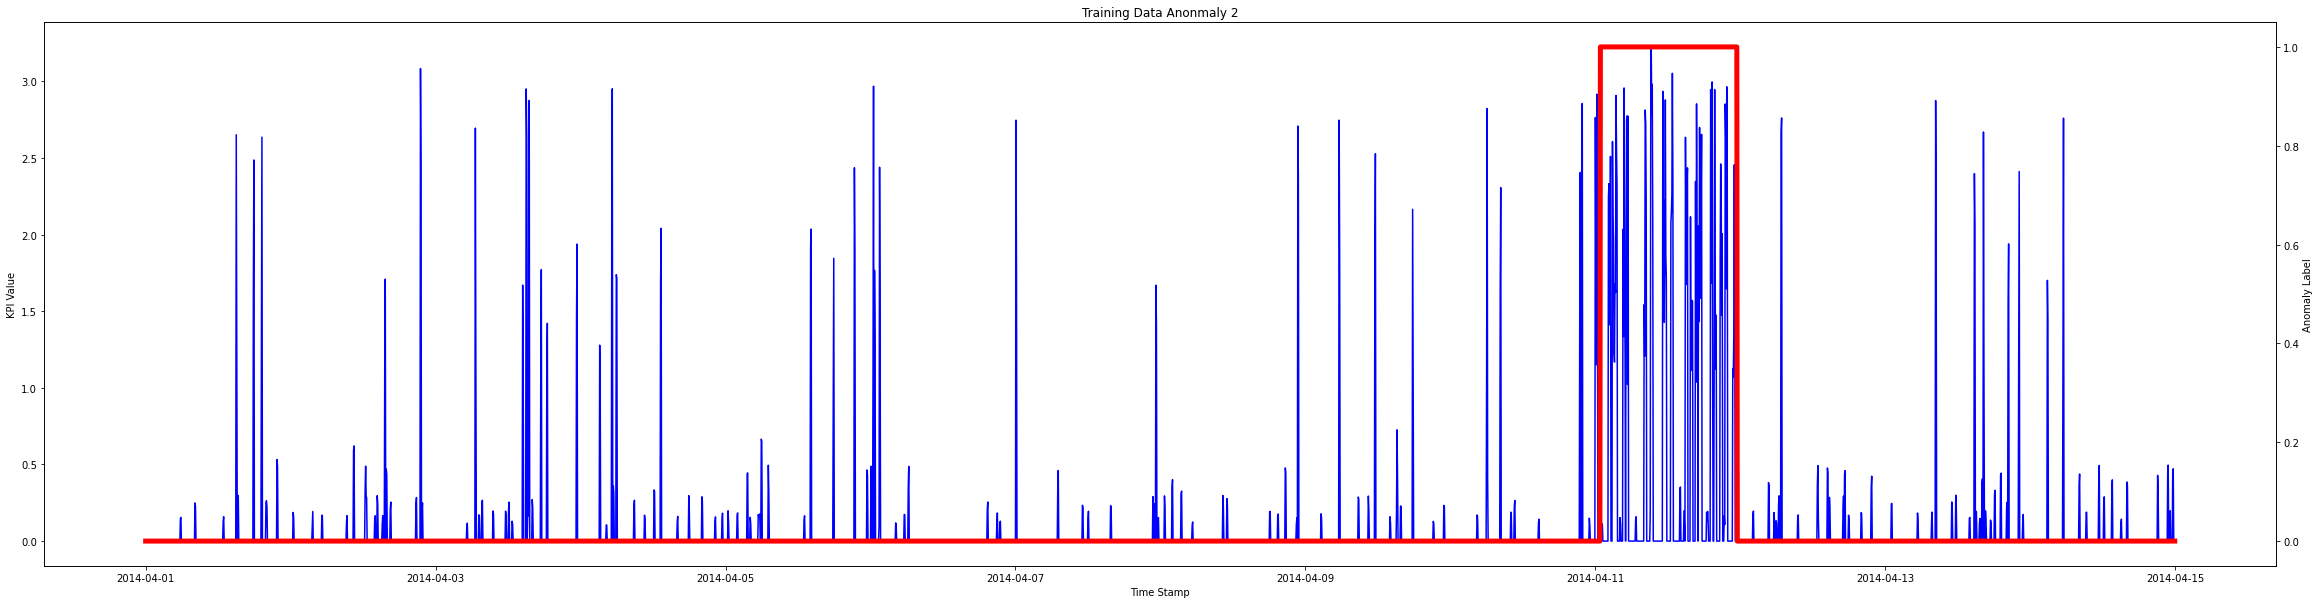

In [7]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(df['timestamp'], df['kpi_value'], color='blue')
ax2a.plot(df['timestamp'], df['anomaly_label'], color='red', linewidth='5')
ax2d.set_xlabel('Time Stamp')
ax2d.set_ylabel('KPI Value')
ax2a.set_ylabel('Anomaly Label')
ax2d.title.set_text('Training Data Anonmaly 2')

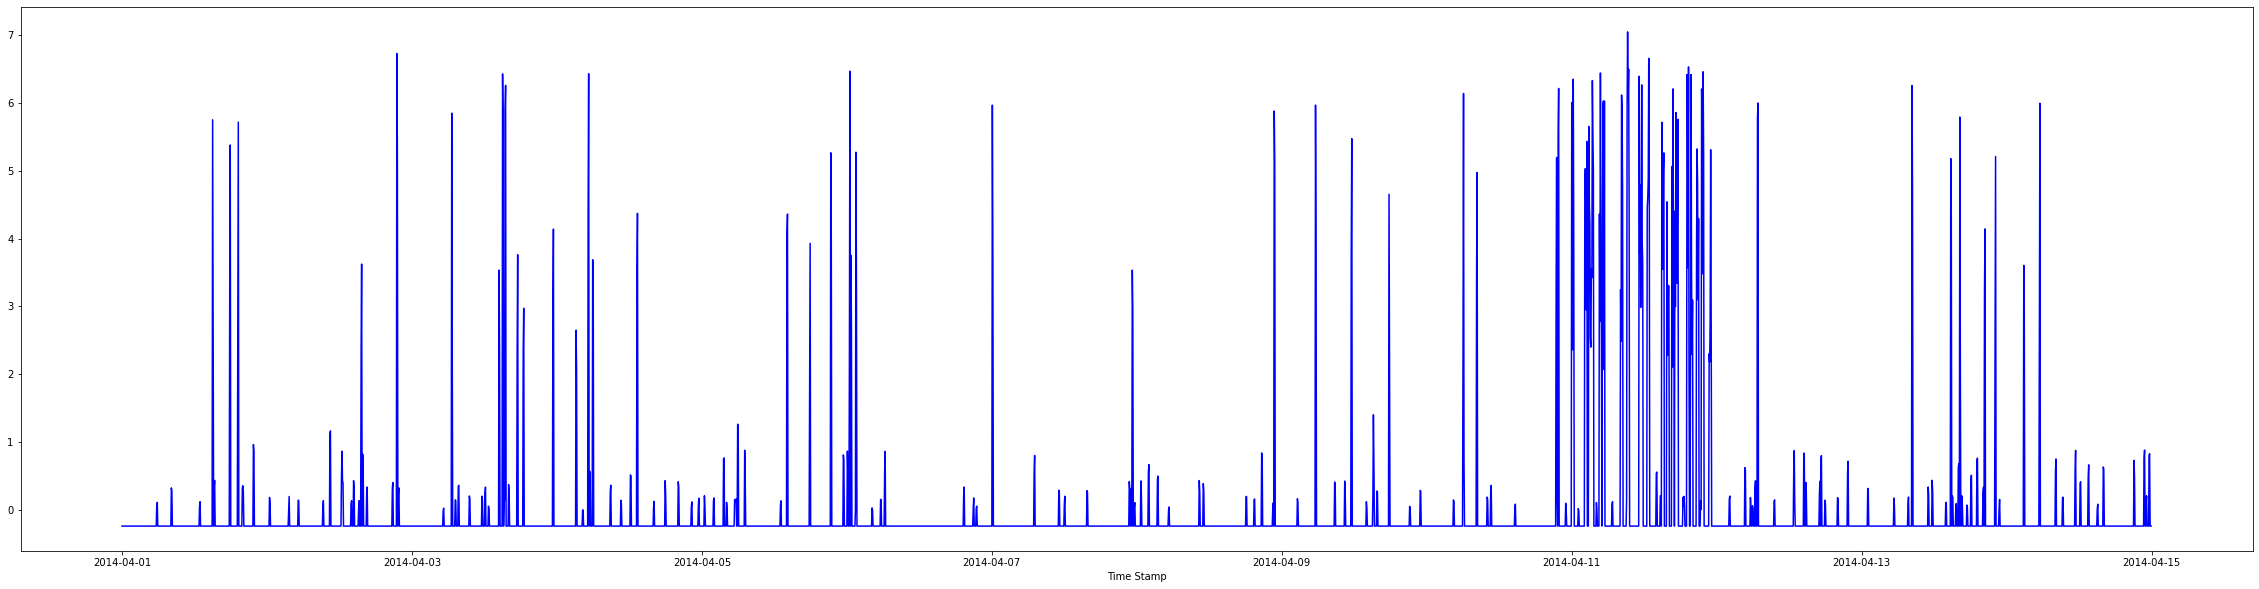

In [8]:
# normalize the data
from sklearn.preprocessing import scale

target=df['kpi_value']
x = scale(target) #Scaled the target in K-Means we only use one target column

x_ax = df['timestamp']
plt.figure(figsize=(40,10))
plt.plot(x_ax, x, color='blue')
plt.xlabel('Time Stamp')
plt.show()

In [9]:
x=x.reshape(-1,1) # We convert this vector to this reshape

# make a clustering model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 1,max_iter=1000,tol=0.01).fit(x)
print(kmeans)

KMeans(max_iter=1000, n_clusters=1, tol=0.01)


In [10]:
center = kmeans.cluster_centers_
print(f"The center of our clusters is: {round(float(center),18)}")

The center of our clusters is: 7.65e-16


In [17]:
# we'll calculate the distance of each sample from the center value.
distance = sqrt((x - center)**2)
threshold60=distance.max()*0.6
threshold80=distance.max()*0.8
print(f"The maximum distance is: {round(distance.max(), 6)}") # This refers to the anomalies
print(f"The minimum distance is: {round(distance.min(), 6)}")
print(f"Our threshold at 60% Maximum Distance is: {round(threshold60, 6)}")
print(f"Our threshold at 80% Maximum Distance is: {round(threshold80, 6)}")

The maximum distance is: 7.049228
The minimum distance is: 0.000976
Our threshold at 60% Maximum Distance is: 4.229537
Our threshold at 80% Maximum Distance is: 5.639382


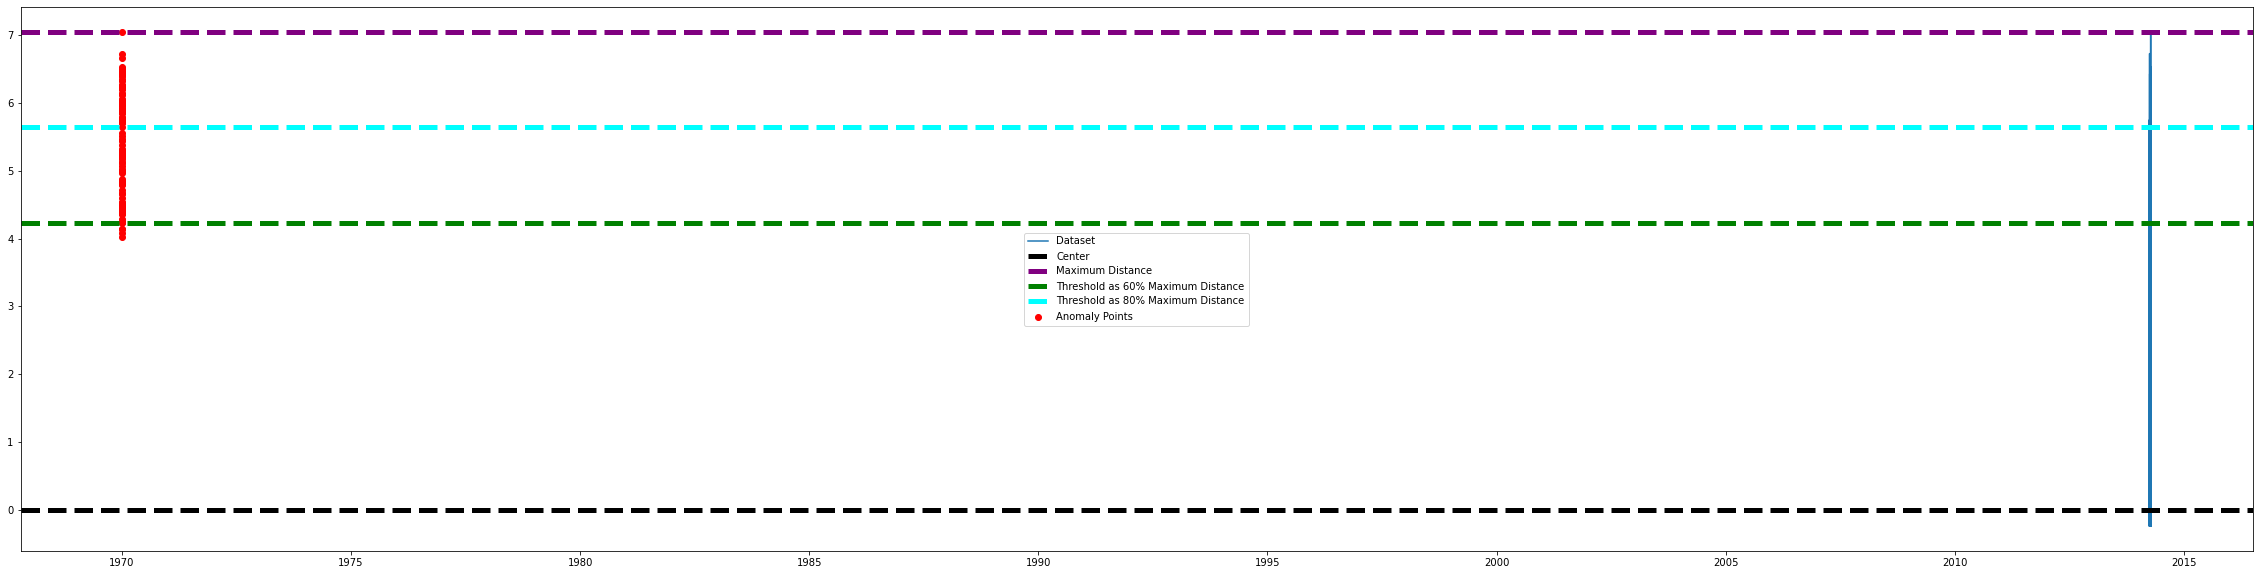

In [28]:
# we'll sort it by using the argsoft() method and extract the settings of elements with the longest distance.

# anomalies=100 # How many anomalies you want
anomalies=100

order_index = argsort(distance, axis = 0)
indexes = order_index[-anomalies:] # Consider this distance as the number of anomalies

values = x[indexes]

# we'll plot the values and show where the anomalies are in red
plt.figure(figsize=(40,10))
plt.plot(x_ax, x)
plt.axhline(y=center, color='black', linestyle='--', linewidth=5)
plt.axhline(y=distance.max(), color='purple', linestyle='--', linewidth=5)
plt.axhline(y=threshold60, color='green', linestyle='--', linewidth=5)
plt.axhline(y=threshold80, color='cyan', linestyle='--', linewidth=5)
plt.scatter(indexes, values, color='r')
plt.legend(["Dataset" ,"Center" , "Maximum Distance", "Threshold as 60% Maximum Distance", "Threshold as 80% Maximum Distance", "Anomaly Points"])
plt.show()

In [33]:
len(values)

100